# Segmentation Preprocessing Notebook

## Introduction
This notebook contains the preprocessing explorations for the selected features in the previous notebook.  

The variables selected were selected for being possible candidates for use in clustering. This doesn't mean they will not be dropped.

The results of this notebook will be turned into the `preprocessing.py` file that will directly take as input the raw data in the AZDIAS and CUSTOMERS dataset

## Context/ Business Goal
The targeted company for this project is an **Organics** company that is selling **mail-ordered** products.

# Imports

In [1]:
# Data Wrangling
import pandas as pd
import numpy as np

# Data Viz
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import matplotlib.patches as mpatch

In [2]:
sns.set_style('whitegrid')

In [3]:
census = pd.read_parquet('data/trusted/census_subset.parquet')

## Dtypes and Groups

In [4]:
df_groups = pd.read_csv('data/trusted/var_group_list.csv')

In [50]:
df_dtypes = pd.read_csv('data/trusted/var_type_list.csv')

print(df_dtypes.shape)

df_dtypes.head()

(339, 3)


,Attribute,Type,dtype
0,AGER_TYP,nominal,int
1,ALTERSKATEGORIE_GROB,interval,int
2,ALTER_HH,interval,int
3,ANREDE_KZ,binary,int
4,ANZ_HAUSHALTE_AKTIV,numeric,float


In [6]:
# Assert all columns have a type
assert len(np.intersect1d(census.columns, df_dtypes['Attribute'])) == (census.shape[1] - 1) # -1 for LNR

In [7]:
# Assert all columns have a group
assert len(np.intersect1d(census.columns, df_groups['Attribute'])) == (census.shape[1] - 1) # -1 for LNR

In [8]:
census.head()

,LNR,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,ANZ_KINDER,ANZ_PERSONEN,ANZ_STATISTISCHE_HAUSHALTE,ANZ_TITEL,ARBEIT,BALLRAUM,CAMEO_DEU_2015,...,SEMIO_VERT,SHOPPER_TYP,SOHO_FLAG,VERS_TYP,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,ANREDE_KZ,ALTERSKATEGORIE_GROB
0,910215,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,None,...,1,NaN,NaN,NaN,NaN,NaN,NaN,3,1,2
1,910220,11.0,0,0.0,2.0,12.0,0.0,3.0,6.0,8A,...,1,3.0,1.0,2.0,3.0,9.0,4.0,5,2,1
2,910225,10.0,0,0.0,1.0,7.0,0.0,3.0,2.0,4C,...,4,2.0,0.0,1.0,3.0,9.0,2.0,5,2,3
3,910226,1.0,0,0.0,0.0,2.0,0.0,2.0,4.0,2A,...,4,1.0,0.0,1.0,NaN,9.0,7.0,3,2,4
4,910241,3.0,0,0.0,4.0,3.0,0.0,4.0,2.0,6B,...,7,2.0,0.0,2.0,2.0,9.0,3.0,4,1,3


In [9]:
census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891221 entries, 0 to 891220
Columns: 303 entries, LNR to ALTERSKATEGORIE_GROB
dtypes: float64(214), int32(1), int64(85), object(3)
memory usage: 2.0+ GB


# Utils

In [72]:
df_dtypes.head()

,Attribute,Type,dtype
0,AGER_TYP,nominal,int
1,ALTERSKATEGORIE_GROB,interval,int
2,ALTER_HH,interval,int
3,ANREDE_KZ,binary,int
4,ANZ_HAUSHALTE_AKTIV,numeric,float


In [10]:
def list_cols_by_type(frame = df_dtypes,data = census,var_type = 'interval'):

    col_list = frame[frame['Type'] == var_type]['Attribute'].values

    intersect = np.intersect1d(col_list, census.columns)

    return intersect

def fetch_info_level_columns(df_att_info,df_data,lvl_name):

    all_names = df_att_info[df_att_info['Information level'] == lvl_name]['Attribute'].values

    names_in_data = np.intersect1d(df_data.columns, all_names)

    return names_in_data

# NaN distribution
A cut was made on the prior notebook that reduced the overall number of columns but it is important to know the general level of NaN values so we know how to handle them

In [11]:
nan_rate = census.isna()\
                    .mean()\
                    .sort_values()

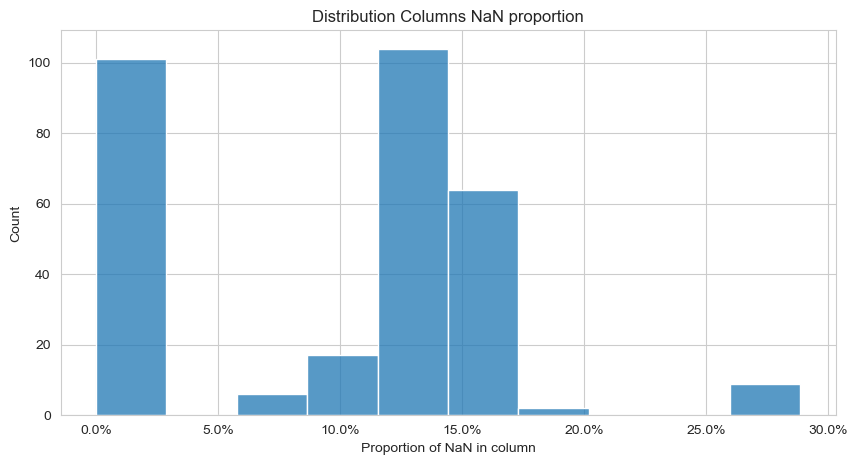

In [12]:
fig, ax = plt.subplots(figsize = (10,5))

sns.histplot(data = nan_rate,
             ax = ax)

ax.set_xlabel('Proportion of NaN in column')

ax.xaxis.set_major_formatter(PercentFormatter(xmax = 1))

plt.title('Distribution Columns NaN proportion')

plt.show()

The majority of columns are missing up to 20% of data.

## Row-wise NaNs
Is there any co-occurance of NaNs?

In [13]:
census['_nan_count'] = census.isna().sum(axis = 1)

<AxesSubplot: title={'center': 'Distribution of NaN values by row'}, ylabel='Frequency'>

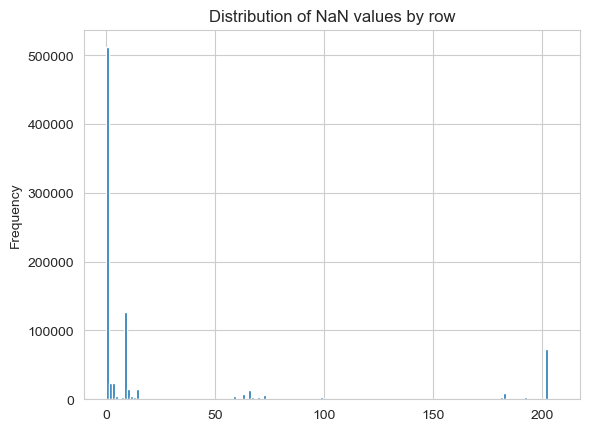

In [14]:
census['_nan_count'].plot(kind = 'hist', bins = 150, title = 'Distribution of NaN values by row')

In [15]:
# Amount of rows that do not have a single NaN value
(census['_nan_count'] == 0).sum()

487606

In [16]:
with pd.option_context('display.max_columns', None):
    display(census[census['_nan_count'] >= 20].sample(10, random_state=123))

,LNR,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,ANZ_KINDER,ANZ_PERSONEN,ANZ_STATISTISCHE_HAUSHALTE,ANZ_TITEL,ARBEIT,BALLRAUM,CAMEO_DEU_2015,CAMEO_DEUG_2015,CAMEO_DEUINTL_2015,CJT_GESAMTTYP,CJT_KATALOGNUTZER,CJT_TYP_1,CJT_TYP_2,CJT_TYP_3,CJT_TYP_4,CJT_TYP_5,CJT_TYP_6,D19_BANKEN_ANZ_12,D19_BANKEN_ANZ_24,D19_BANKEN_DATUM,D19_BANKEN_DIREKT_RZ,D19_BANKEN_GROSS_RZ,D19_BANKEN_LOKAL_RZ,D19_BANKEN_OFFLINE_DATUM,D19_BANKEN_ONLINE_DATUM,D19_BANKEN_ONLINE_QUOTE_12,D19_BANKEN_REST_RZ,D19_BEKLEIDUNG_GEH_RZ,D19_BEKLEIDUNG_REST_RZ,D19_BILDUNG_RZ,D19_BIO_OEKO_RZ,D19_BUCH_CD_RZ,D19_DIGIT_SERV_RZ,D19_DROGERIEARTIKEL_RZ,D19_ENERGIE_RZ,D19_FREIZEIT_RZ,D19_GARTEN_RZ,D19_GESAMT_ANZ_12,D19_GESAMT_ANZ_24,D19_GESAMT_DATUM,D19_GESAMT_OFFLINE_DATUM,D19_GESAMT_ONLINE_DATUM,D19_GESAMT_ONLINE_QUOTE_12,D19_HANDWERK_RZ,D19_HAUS_DEKO_RZ,D19_KINDERARTIKEL_RZ,D19_KONSUMTYP,D19_KONSUMTYP_MAX_RZ,D19_KOSMETIK_RZ,D19_LEBENSMITTEL_RZ,D19_LETZTER_KAUF_BRANCHE_RZ,D19_LOTTO_RZ,D19_NAHRUNGSERGAENZUNG_RZ,D19_RATGEBER_RZ,D19_REISEN_RZ,D19_SAMMELARTIKEL_RZ,D19_SCHUHE_RZ,D19_SONSTIGE_RZ,D19_SOZIALES_RZ,D19_TECHNIK_RZ,D19_TELKO_ANZ_12,D19_TELKO_ANZ_24,D19_TELKO_DATUM,D19_TELKO_MOBILE_RZ,D19_TELKO_OFFLINE_DATUM,D19_TELKO_ONLINE_DATUM,D19_TELKO_ONLINE_QUOTE_12,D19_TELKO_REST_RZ,D19_TIERARTIKEL_RZ,D19_VERSAND_ANZ_12,D19_VERSAND_ANZ_24,D19_VERSAND_DATUM,D19_VERSAND_OFFLINE_DATUM,D19_VERSAND_ONLINE_DATUM,D19_VERSAND_ONLINE_QUOTE_12,D19_VERSAND_REST_RZ,D19_VERSI_ANZ_12,D19_VERSI_ANZ_24,D19_VERSI_DATUM,D19_VERSI_OFFLINE_DATUM,D19_VERSI_ONLINE_DATUM,D19_VERSI_ONLINE_QUOTE_12,D19_VERSICHERUNGEN_RZ,D19_VOLLSORTIMENT_RZ,D19_WEIN_FEINKOST_RZ,EWDICHTE,FINANZ_ANLEGER,FINANZ_HAUSBAUER,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_UNAUFFAELLIGER,FINANZ_VORSORGER,FINANZTYP,GEBAEUDETYP,GEBAEUDETYP_RASTER,GFK_URLAUBERTYP,GREEN_AVANTGARDE,HEALTH_TYP,HH_EINKOMMEN_SCORE,INNENSTADT,KBA05_ALTER1,KBA05_ALTER2,KBA05_ALTER3,KBA05_ALTER4,KBA05_ANHANG,KBA05_ANTG1,KBA05_ANTG2,KBA05_ANTG3,KBA05_ANTG4,KBA05_AUTOQUOT,KBA05_CCM1,KBA05_CCM2,KBA05_CCM3,KBA05_CCM4,KBA05_DIESEL,KBA05_FRAU,KBA05_GBZ,KBA05_HERST1,KBA05_HERST2,KBA05_HERST3,KBA05_HERST4,KBA05_HERST5,KBA05_HERSTTEMP,KBA05_KRSAQUOT,KBA05_KRSHERST1,KBA05_KRSHERST2,KBA05_KRSHERST3,KBA05_KRSKLEIN,KBA05_KRSOBER,KBA05_KRSVAN,KBA05_KRSZUL,KBA05_KW1,KBA05_KW2,KBA05_KW3,KBA05_MAXAH,KBA05_MAXBJ,KBA05_MAXHERST,KBA05_MAXSEG,KBA05_MAXVORB,KBA05_MOD1,KBA05_MOD2,KBA05_MOD3,KBA05_MOD4,KBA05_MOD8,KBA05_MODTEMP,KBA05_MOTOR,KBA05_MOTRAD,KBA05_SEG1,KBA05_SEG10,KBA05_SEG2,KBA05_SEG3,KBA05_SEG4,KBA05_SEG5,KBA05_SEG6,KBA05_SEG7,KBA05_SEG8,KBA05_SEG9,KBA05_VORB0,KBA05_VORB1,KBA05_VORB2,KBA05_ZUL1,KBA05_ZUL2,KBA05_ZUL3,KBA05_ZUL4,KBA13_ALTERHALTER_30,KBA13_ALTERHALTER_45,KBA13_ALTERHALTER_60,KBA13_ALTERHALTER_61,KBA13_ANZAHL_PKW,KBA13_AUDI,KBA13_AUTOQUOTE,KBA13_BJ_1999,KBA13_BJ_2000,KBA13_BJ_2004,KBA13_BJ_2006,KBA13_BJ_2008,KBA13_BJ_2009,KBA13_BMW,KBA13_CCM_0_1400,KBA13_CCM_1000,KBA13_CCM_1200,KBA13_CCM_1400,KBA13_CCM_1500,KBA13_CCM_1600,KBA13_CCM_1800,KBA13_CCM_2000,KBA13_CCM_2500,KBA13_CCM_2501,KBA13_CCM_3000,KBA13_CCM_3001,KBA13_FAB_ASIEN,KBA13_FAB_SONSTIGE,KBA13_FIAT,KBA13_FORD,KBA13_HERST_ASIEN,KBA13_HERST_AUDI_VW,KBA13_HERST_BMW_BENZ,KBA13_HERST_EUROPA,KBA13_HERST_FORD_OPEL,KBA13_HERST_SONST,KBA13_KMH_0_140,KBA13_KMH_140_210,KBA13_KMH_211,KBA13_KRSAQUOT,KBA13_KRSHERST_AUDI_VW,KBA13_KRSHERST_BMW_BENZ,KBA13_KRSHERST_FORD_OPEL,KBA13_KRSSEG_KLEIN,KBA13_KRSSEG_OBER,KBA13_KRSSEG_VAN,KBA13_KRSZUL_NEU,KBA13_KW_0_60,KBA13_KW_110,KBA13_KW_120,KBA13_KW_121,KBA13_KW_30,KBA13_KW_40,KBA13_KW_50,KBA13_KW_60,KBA13_KW_61_120,KBA13_KW_70,KBA13_KW_80,KBA13_KW_90,KBA13_MAZDA,KBA13_MERCEDES,KBA13_MOTOR,KBA13_NISSAN,KBA13_OPEL,KBA13_PEUGEOT,KBA13_RENAULT,KBA13_SEG_GELAENDEWAGEN,KBA13_SEG_GROSSRAUMVANS,KBA13_SEG_KLEINST,KBA13_SEG_KLEINWAGEN,KBA13_SEG_KOMPAKTKLASSE,KBA13_SEG_MINIVANS,KBA13_SEG_MINIWAGEN,KBA13_SEG_MITTELKLASSE,KBA13_SEG_OBEREMITTELKLASSE,KBA13_SEG_OBERKLASSE,KBA13_SEG_SONSTIGE,KBA13_SEG_SPORTWAGEN,KBA13_SEG_UTILITIES,KBA13_SEG_VAN,KBA13_SEG_WOHNMOBILE,KBA13_SITZE_4,KBA13_SITZE_5,KBA13_SITZE_6,K

In [17]:
with pd.option_context('display.max_columns', None):
    display(census[census['_nan_count'] < 20].sample(10, random_state=123))

,LNR,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,ANZ_KINDER,ANZ_PERSONEN,ANZ_STATISTISCHE_HAUSHALTE,ANZ_TITEL,ARBEIT,BALLRAUM,CAMEO_DEU_2015,CAMEO_DEUG_2015,CAMEO_DEUINTL_2015,CJT_GESAMTTYP,CJT_KATALOGNUTZER,CJT_TYP_1,CJT_TYP_2,CJT_TYP_3,CJT_TYP_4,CJT_TYP_5,CJT_TYP_6,D19_BANKEN_ANZ_12,D19_BANKEN_ANZ_24,D19_BANKEN_DATUM,D19_BANKEN_DIREKT_RZ,D19_BANKEN_GROSS_RZ,D19_BANKEN_LOKAL_RZ,D19_BANKEN_OFFLINE_DATUM,D19_BANKEN_ONLINE_DATUM,D19_BANKEN_ONLINE_QUOTE_12,D19_BANKEN_REST_RZ,D19_BEKLEIDUNG_GEH_RZ,D19_BEKLEIDUNG_REST_RZ,D19_BILDUNG_RZ,D19_BIO_OEKO_RZ,D19_BUCH_CD_RZ,D19_DIGIT_SERV_RZ,D19_DROGERIEARTIKEL_RZ,D19_ENERGIE_RZ,D19_FREIZEIT_RZ,D19_GARTEN_RZ,D19_GESAMT_ANZ_12,D19_GESAMT_ANZ_24,D19_GESAMT_DATUM,D19_GESAMT_OFFLINE_DATUM,D19_GESAMT_ONLINE_DATUM,D19_GESAMT_ONLINE_QUOTE_12,D19_HANDWERK_RZ,D19_HAUS_DEKO_RZ,D19_KINDERARTIKEL_RZ,D19_KONSUMTYP,D19_KONSUMTYP_MAX_RZ,D19_KOSMETIK_RZ,D19_LEBENSMITTEL_RZ,D19_LETZTER_KAUF_BRANCHE_RZ,D19_LOTTO_RZ,D19_NAHRUNGSERGAENZUNG_RZ,D19_RATGEBER_RZ,D19_REISEN_RZ,D19_SAMMELARTIKEL_RZ,D19_SCHUHE_RZ,D19_SONSTIGE_RZ,D19_SOZIALES_RZ,D19_TECHNIK_RZ,D19_TELKO_ANZ_12,D19_TELKO_ANZ_24,D19_TELKO_DATUM,D19_TELKO_MOBILE_RZ,D19_TELKO_OFFLINE_DATUM,D19_TELKO_ONLINE_DATUM,D19_TELKO_ONLINE_QUOTE_12,D19_TELKO_REST_RZ,D19_TIERARTIKEL_RZ,D19_VERSAND_ANZ_12,D19_VERSAND_ANZ_24,D19_VERSAND_DATUM,D19_VERSAND_OFFLINE_DATUM,D19_VERSAND_ONLINE_DATUM,D19_VERSAND_ONLINE_QUOTE_12,D19_VERSAND_REST_RZ,D19_VERSI_ANZ_12,D19_VERSI_ANZ_24,D19_VERSI_DATUM,D19_VERSI_OFFLINE_DATUM,D19_VERSI_ONLINE_DATUM,D19_VERSI_ONLINE_QUOTE_12,D19_VERSICHERUNGEN_RZ,D19_VOLLSORTIMENT_RZ,D19_WEIN_FEINKOST_RZ,EWDICHTE,FINANZ_ANLEGER,FINANZ_HAUSBAUER,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_UNAUFFAELLIGER,FINANZ_VORSORGER,FINANZTYP,GEBAEUDETYP,GEBAEUDETYP_RASTER,GFK_URLAUBERTYP,GREEN_AVANTGARDE,HEALTH_TYP,HH_EINKOMMEN_SCORE,INNENSTADT,KBA05_ALTER1,KBA05_ALTER2,KBA05_ALTER3,KBA05_ALTER4,KBA05_ANHANG,KBA05_ANTG1,KBA05_ANTG2,KBA05_ANTG3,KBA05_ANTG4,KBA05_AUTOQUOT,KBA05_CCM1,KBA05_CCM2,KBA05_CCM3,KBA05_CCM4,KBA05_DIESEL,KBA05_FRAU,KBA05_GBZ,KBA05_HERST1,KBA05_HERST2,KBA05_HERST3,KBA05_HERST4,KBA05_HERST5,KBA05_HERSTTEMP,KBA05_KRSAQUOT,KBA05_KRSHERST1,KBA05_KRSHERST2,KBA05_KRSHERST3,KBA05_KRSKLEIN,KBA05_KRSOBER,KBA05_KRSVAN,KBA05_KRSZUL,KBA05_KW1,KBA05_KW2,KBA05_KW3,KBA05_MAXAH,KBA05_MAXBJ,KBA05_MAXHERST,KBA05_MAXSEG,KBA05_MAXVORB,KBA05_MOD1,KBA05_MOD2,KBA05_MOD3,KBA05_MOD4,KBA05_MOD8,KBA05_MODTEMP,KBA05_MOTOR,KBA05_MOTRAD,KBA05_SEG1,KBA05_SEG10,KBA05_SEG2,KBA05_SEG3,KBA05_SEG4,KBA05_SEG5,KBA05_SEG6,KBA05_SEG7,KBA05_SEG8,KBA05_SEG9,KBA05_VORB0,KBA05_VORB1,KBA05_VORB2,KBA05_ZUL1,KBA05_ZUL2,KBA05_ZUL3,KBA05_ZUL4,KBA13_ALTERHALTER_30,KBA13_ALTERHALTER_45,KBA13_ALTERHALTER_60,KBA13_ALTERHALTER_61,KBA13_ANZAHL_PKW,KBA13_AUDI,KBA13_AUTOQUOTE,KBA13_BJ_1999,KBA13_BJ_2000,KBA13_BJ_2004,KBA13_BJ_2006,KBA13_BJ_2008,KBA13_BJ_2009,KBA13_BMW,KBA13_CCM_0_1400,KBA13_CCM_1000,KBA13_CCM_1200,KBA13_CCM_1400,KBA13_CCM_1500,KBA13_CCM_1600,KBA13_CCM_1800,KBA13_CCM_2000,KBA13_CCM_2500,KBA13_CCM_2501,KBA13_CCM_3000,KBA13_CCM_3001,KBA13_FAB_ASIEN,KBA13_FAB_SONSTIGE,KBA13_FIAT,KBA13_FORD,KBA13_HERST_ASIEN,KBA13_HERST_AUDI_VW,KBA13_HERST_BMW_BENZ,KBA13_HERST_EUROPA,KBA13_HERST_FORD_OPEL,KBA13_HERST_SONST,KBA13_KMH_0_140,KBA13_KMH_140_210,KBA13_KMH_211,KBA13_KRSAQUOT,KBA13_KRSHERST_AUDI_VW,KBA13_KRSHERST_BMW_BENZ,KBA13_KRSHERST_FORD_OPEL,KBA13_KRSSEG_KLEIN,KBA13_KRSSEG_OBER,KBA13_KRSSEG_VAN,KBA13_KRSZUL_NEU,KBA13_KW_0_60,KBA13_KW_110,KBA13_KW_120,KBA13_KW_121,KBA13_KW_30,KBA13_KW_40,KBA13_KW_50,KBA13_KW_60,KBA13_KW_61_120,KBA13_KW_70,KBA13_KW_80,KBA13_KW_90,KBA13_MAZDA,KBA13_MERCEDES,KBA13_MOTOR,KBA13_NISSAN,KBA13_OPEL,KBA13_PEUGEOT,KBA13_RENAULT,KBA13_SEG_GELAENDEWAGEN,KBA13_SEG_GROSSRAUMVANS,KBA13_SEG_KLEINST,KBA13_SEG_KLEINWAGEN,KBA13_SEG_KOMPAKTKLASSE,KBA13_SEG_MINIVANS,KBA13_SEG_MINIWAGEN,KBA13_SEG_MITTELKLASSE,KBA13_SEG_OBEREMITTELKLASSE,KBA13_SEG_OBERKLASSE,KBA13_SEG_SONSTIGE,KBA13_SEG_SPORTWAGEN,KBA13_SEG_UTILITIES,KBA13_SEG_VAN,KBA13_SEG_WOHNMOBILE,KBA13_SITZE_4,KBA13_SITZE_5,KBA13_SITZE_6,K

Looking into samples, it looks like NaNs occur somewhat simultaneously across different segments of columns.  
This indicates that data might be Missing at Random (MAR). The missing values can be related to persons that did not answer all questionnaires.  
For more insight into this, this [link](https://www.scribbr.com/statistics/missing-data/) is available.  

Either way, data points that have too many empty columns might affect clustering performance, since a big chunk of their distributions might be imputed

In [18]:
census['_nan_prop'] = census['_nan_count'] / census.shape[1]

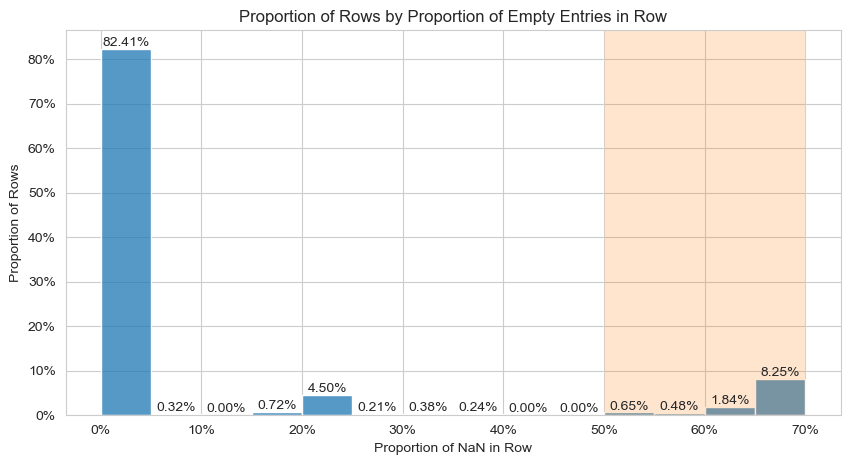

In [19]:
fig, ax = plt.subplots(figsize = (10,5))

g = sns.histplot(census, x = '_nan_prop', binwidth = 0.05, stat = 'percent', ax = ax)

g.bar_label(g.containers[-1],
            labels = [f'{y.get_height():.2f}%' for y in g.containers[-1]])

g.yaxis.set_major_formatter(PercentFormatter())

g.xaxis.set_major_formatter(PercentFormatter(xmax = 1))

g.add_patch(mpatch.Rectangle((0.5,0),0.2,87, facecolor = 'tab:orange', alpha = 0.2))

plt.title('Proportion of Rows by Proportion of Empty Entries in Row')

g.set_xlabel('Proportion of NaN in Row')

g.set_ylabel('Proportion of Rows')

plt.show()

From the graph above, most rows have up to 20% of their columns with NaNs. This is a relatively high number, but the spikes in the 60 - 70% is more worrying.

In [20]:
row_total = census.shape[0]

for thresh in [0.2,0.3,0.5,0.6]:

    row_count = census[census['_nan_prop'] <= thresh].shape[0]

    print(f'Proportion of remaining rows for {thresh:.2%} threshold: {(row_count / row_total):.2%}')


Proportion of remaining rows for 20.00% threshold: 83.45%
Proportion of remaining rows for 30.00% threshold: 88.16%
Proportion of remaining rows for 50.00% threshold: 88.78%
Proportion of remaining rows for 60.00% threshold: 89.91%


Given that the rows missing a lot of columns have a bigger impact on the dataframe, a cut for 30% will be done to the data.  
30% is still a considerable amount of columns missing from the data, but heavier cuts like will result in an even bigger data loss.  

Either way the main purpose of the cut will be to avoid that rows get too many imputed values, especially those with > 50% empty columns.

# Fixing object cols
Giving the columns that make sense numerical encodings

In [21]:
object_cols = census.dtypes[census.dtypes == object].index

In [22]:
census[object_cols].head()

,CAMEO_DEU_2015,D19_LETZTER_KAUF_BRANCHE_RZ,OST_WEST_KZ
0,None,None,None
1,8A,None,W
2,4C,D19_UNBEKANNT,W
3,2A,D19_UNBEKANNT,W
4,6B,D19_SCHUHE,W


## Ost - West

In [23]:
census['OST_WEST_KZ'].unique()

array([None, 'W', 'O'], dtype=object)

In [24]:
census['OST_WEST_KZ'] = census['OST_WEST_KZ'].map({'O':0,'W':1})

## CAMEO_DEU_2015

In [25]:
unique_vals_cameo = list(census['CAMEO_DEU_2015'].dropna().unique())

print(unique_vals_cameo)

['8A', '4C', '2A', '6B', '8C', '4A', '2D', '1A', '1E', '9D', '5C', '8B', '7A', '5D', '9E', '9B', '1B', '3D', '4E', '4B', '3C', '5A', '7B', '9A', '6D', '6E', '2C', '7C', '9C', '7D', '5E', '1D', '8D', '6C', '6A', '5B', '4D', '3A', '2B', '7E', '3B', '6F', '5F', '1C']


In [26]:
# Sorting values
unique_vals_cameo = sorted(unique_vals_cameo)

In [27]:
unique_vals_cameo

['1A',
 '1B',
 '1C',
 '1D',
 '1E',
 '2A',
 '2B',
 '2C',
 '2D',
 '3A',
 '3B',
 '3C',
 '3D',
 '4A',
 '4B',
 '4C',
 '4D',
 '4E',
 '5A',
 '5B',
 '5C',
 '5D',
 '5E',
 '5F',
 '6A',
 '6B',
 '6C',
 '6D',
 '6E',
 '6F',
 '7A',
 '7B',
 '7C',
 '7D',
 '7E',
 '8A',
 '8B',
 '8C',
 '8D',
 '9A',
 '9B',
 '9C',
 '9D',
 '9E']

From the 'Values' Spreasheet, we can see that these variables have an ordinal component to them. Therefore, each category will be associated to unique integers, like the other columns

In [28]:
int_range = range(1, len(unique_vals_cameo) + 1)

cameo_map = dict(zip(unique_vals_cameo, int_range))

In [29]:
assert max(int_range) == len(unique_vals_cameo)

In [30]:
census['CAMEO_DEU_2015'].head()

0    None
1      8A
2      4C
3      2A
4      6B
Name: CAMEO_DEU_2015, dtype: object

In [31]:
census['CAMEO_DEU_2015'] = census['CAMEO_DEU_2015'].map(cameo_map)

In [32]:
census['CAMEO_DEU_2015'].isna().mean()

0.11147852216229195

# Checking Intervals
Checking especially if there are any NaNs/ problems that were not identified and if the amount of actual unique categories in each column is helpful to use them as scale

In [33]:
int_col_list = list_cols_by_type()

In [34]:
for col in int_col_list:

    print(col)

    print('# of unique values:', census[col].nunique(), f'min: {census[col].min()}', f'max: {census[col].max()}', end = '\n\n')

ALTERSKATEGORIE_GROB
# of unique values: 5 min: 1 max: 9

ARBEIT
# of unique values: 5 min: 1.0 max: 5.0

BALLRAUM
# of unique values: 7 min: 1.0 max: 7.0

CAMEO_DEUG_2015
# of unique values: 9 min: 1.0 max: 9.0

CAMEO_DEUINTL_2015
# of unique values: 21 min: 12.0 max: 55.0

CAMEO_DEU_2015
# of unique values: 44 min: 1.0 max: 44.0

CJT_KATALOGNUTZER
# of unique values: 5 min: 1.0 max: 5.0

CJT_TYP_1
# of unique values: 5 min: 1.0 max: 5.0

CJT_TYP_2
# of unique values: 5 min: 1.0 max: 5.0

CJT_TYP_3
# of unique values: 5 min: 1.0 max: 5.0

CJT_TYP_4
# of unique values: 5 min: 1.0 max: 5.0

CJT_TYP_5
# of unique values: 5 min: 1.0 max: 5.0

CJT_TYP_6
# of unique values: 5 min: 1.0 max: 5.0

D19_BANKEN_ANZ_12
# of unique values: 7 min: 0 max: 6

D19_BANKEN_ANZ_24
# of unique values: 7 min: 0 max: 6

D19_BANKEN_DATUM
# of unique values: 10 min: 1 max: 10

D19_BANKEN_DIREKT_RZ
# of unique values: 8 min: 0 max: 7

D19_BANKEN_GROSS_RZ
# of unique values: 7 min: 0 max: 6

D19_BANKEN_LOKAL_RZ


# of unique values: 8 min: 0 max: 7

D19_BIO_OEKO_RZ
# of unique values: 8 min: 0 max: 7

D19_BUCH_CD_RZ
# of unique values: 8 min: 0 max: 7

D19_DIGIT_SERV_RZ
# of unique values: 8 min: 0 max: 7

D19_DROGERIEARTIKEL_RZ
# of unique values: 8 min: 0 max: 7

D19_ENERGIE_RZ
# of unique values: 8 min: 0 max: 7

D19_FREIZEIT_RZ
# of unique values: 8 min: 0 max: 7

D19_GARTEN_RZ
# of unique values: 8 min: 0 max: 7

D19_GESAMT_ANZ_12
# of unique values: 7 min: 0 max: 6

D19_GESAMT_ANZ_24
# of unique values: 7 min: 0 max: 6

D19_GESAMT_DATUM
# of unique values: 10 min: 1 max: 10

D19_GESAMT_OFFLINE_DATUM
# of unique values: 10 min: 1 max: 10

D19_GESAMT_ONLINE_DATUM
# of unique values: 10 min: 1 max: 10

D19_GESAMT_ONLINE_QUOTE_12
# of unique values: 11 min: 0.0 max: 10.0

D19_HANDWERK_RZ
# of unique values: 8 min: 0 max: 7

D19_HAUS_DEKO_RZ
# of unique values: 8 min: 0 max: 7

D19_KINDERARTIKEL_RZ
# of unique values: 8 min: 0 max: 7

D19_KONSUMTYP_MAX_RZ
# of unique values: 6 min: 1 max: 9

D

Interval columns look OK, no out of ordinary values are in the maxima or minima.

# Numeric columns
Some columns are actually numeric, but not all of them. This happens especially because of float values

In [35]:
num_cols = list_cols_by_type(var_type = 'numeric')

In [36]:
num_cols

array(['ANZ_HAUSHALTE_AKTIV', 'ANZ_KINDER', 'ANZ_PERSONEN',
       'ANZ_STATISTISCHE_HAUSHALTE', 'ANZ_TITEL', 'KBA13_ANZAHL_PKW',
       'MIN_GEBAEUDEJAHR'], dtype=object)

## Numeric Cols

In [37]:
census[num_cols].describe()

,ANZ_HAUSHALTE_AKTIV,ANZ_KINDER,ANZ_PERSONEN,ANZ_STATISTISCHE_HAUSHALTE,ANZ_TITEL,KBA13_ANZAHL_PKW,MIN_GEBAEUDEJAHR
count,798073.000000,817722.000000,817722.000000,798073.000000,817722.000000,785421.000000,798073.000000
mean,8.287263,0.154018,1.727637,7.599356,0.004162,619.701439,1993.277011
std,15.628087,0.502389,1.155849,14.332201,0.068855,340.034318,3.332739
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1985.000000
25%,1.000000,0.000000,1.000000,1.000000,0.000000,384.000000,1992.000000
50%,4.000000,0.000000,1.000000,3.000000,0.000000,549.000000,1992.000000
75%,9.000000,0.000000,2.000000,9.000000,0.000000,778.000000,1993.000000
max,595.000000,11.000000,45.000000,449.000000,6.000000,2300.000000,2016.000000


Some problems:

- Number of persons in HOUSEHOLD having max at 45

#### Person count

In [38]:
census['ANZ_PERSONEN'].nunique()

30

In [39]:
census[census['ANZ_PERSONEN'] >= 10].shape[0]

162

Only a few entries are greater than 10. Will not be handled

## Other Cols

In [40]:
non_binary_cols = np.intersect1d(df_dtypes[df_dtypes['Type'] != 'binary']['Attribute'], census.columns)

In [41]:
# Looking for binary cols
for col in non_binary_cols:

    column = census[col].dropna()

    unique_values = column.unique()

    if len(unique_values) == 2:

        print(col, 'Binary')

Before we move on to modelling, we need to first adopt inputing strategies for the remaining cols

# Imputing strategy

Given the variable characteristics and the distribution of NaN proportion above, the following inputing strategy will be followed:

Categorical variables include: Interval, Nominal and Binary  
For categorical variables, inpute the mode


Numerical will be replaced with mean, for simplicity

## Categorical Imputing

In [42]:
cat_cols = df_dtypes[df_dtypes['Type'].isin(['interval', 'nominal', 'binary'])]['Attribute'].values

cat_cols = list(np.intersect1d(cat_cols, census.columns))

In [43]:
for col in cat_cols:

    try:
        census[col].fillna(census[col].mode()[0], inplace = True)

    except:
        
        print(census[col].mode())

        print(col)

        raise

## Numerical Imputing

In [42]:
for col in num_cols:

    census[col].fillna(census[col].mean(), inplace = True)

# Aggregating D19 columns

125 x 125 Grid and Household informations

## Grid columns

In [45]:
df_groups['Information level'].unique()

array(['Person', 'Household', 'Building', 'Microcell (RR4_ID)',
       'Microcell (RR3_ID)', '125m x 125m Grid', 'Postcode', 'RR1_ID',
       'PLZ8', 'Community'], dtype=object)

In [68]:
grid_cols_list = fetch_info_level_columns(df_groups, census, '125m x 125m Grid')

In [71]:
df_groups

,Information level,Attribute
0,Person,AGER_TYP
1,Person,ALTERSKATEGORIE_GROB
2,Person,ANREDE_KZ
3,Person,CJT_GESAMTTYP
4,Person,FINANZ_MINIMALIST
...,...,...
342,Household,ALTER_KIND3
343,Household,ALTER_KIND4
344,Household,ANZ_KINDER
345,Household,ANZ_STATISTISCHE_HAUSHALTE


In [69]:
grid_cols_list

array(['D19_BANKEN_DIREKT_RZ', 'D19_BANKEN_GROSS_RZ',
       'D19_BANKEN_LOKAL_RZ', 'D19_BANKEN_REST_RZ',
       'D19_BEKLEIDUNG_GEH_RZ', 'D19_BEKLEIDUNG_REST_RZ',
       'D19_BILDUNG_RZ', 'D19_BIO_OEKO_RZ', 'D19_BUCH_CD_RZ',
       'D19_DIGIT_SERV_RZ', 'D19_DROGERIEARTIKEL_RZ', 'D19_ENERGIE_RZ',
       'D19_FREIZEIT_RZ', 'D19_GARTEN_RZ', 'D19_HANDWERK_RZ',
       'D19_HAUS_DEKO_RZ', 'D19_KINDERARTIKEL_RZ', 'D19_KOSMETIK_RZ',
       'D19_LEBENSMITTEL_RZ', 'D19_LETZTER_KAUF_BRANCHE_RZ',
       'D19_LOTTO_RZ', 'D19_NAHRUNGSERGAENZUNG_RZ', 'D19_RATGEBER_RZ',
       'D19_REISEN_RZ', 'D19_SAMMELARTIKEL_RZ', 'D19_SCHUHE_RZ',
       'D19_SONSTIGE_RZ', 'D19_SOZIALES_RZ', 'D19_TECHNIK_RZ',
       'D19_TELKO_MOBILE_RZ', 'D19_TELKO_REST_RZ', 'D19_TIERARTIKEL_RZ',
       'D19_VERSAND_REST_RZ', 'D19_VERSICHERUNGEN_RZ',
       'D19_VOLLSORTIMENT_RZ', 'D19_WEIN_FEINKOST_RZ'], dtype=object)

### Aggregation
Logic:

0 = No transaction  
1,2,3 = Buyer within 12 months  
4,5,6 = Buyer within 12 - 24 months  
7 = Prospects

In [48]:
for col in grid_cols_list:

    grid_conditions = [census[col] == 0,
                    census[col].isin([1,2,3]),
                    census[col].isin([4,5,6]),
                    census[col] == 7]

    grid_choices = [0,1,2,3]

    census[col] = np.select(grid_conditions, grid_choices, default = np.nan)

In [49]:
for col in grid_cols_list:

    display(census[col].value_counts().sort_index())

0.0    728811
1.0     42646
2.0    112108
3.0      7656
Name: D19_BANKEN_DIREKT_RZ, dtype: int64

0.0    785351
1.0     26691
2.0     79179
Name: D19_BANKEN_GROSS_RZ, dtype: int64

0.0    874745
1.0      3630
2.0      4324
3.0      8522
Name: D19_BANKEN_LOKAL_RZ, dtype: int64

0.0    821760
1.0      9787
2.0     52335
3.0      7339
Name: D19_BANKEN_REST_RZ, dtype: int64

0.0    809304
1.0     20135
2.0     53304
3.0      8478
Name: D19_BEKLEIDUNG_GEH_RZ, dtype: int64

0.0    692502
1.0     46211
2.0    132871
3.0     19637
Name: D19_BEKLEIDUNG_REST_RZ, dtype: int64

0.0    813156
1.0     14084
2.0     42153
3.0     21828
Name: D19_BILDUNG_RZ, dtype: int64

0.0    854074
1.0      1970
2.0     19936
3.0     15241
Name: D19_BIO_OEKO_RZ, dtype: int64

0.0    622788
1.0     47114
2.0    212466
3.0      8853
Name: D19_BUCH_CD_RZ, dtype: int64

0.0    857661
1.0      7898
2.0     21632
3.0      4030
Name: D19_DIGIT_SERV_RZ, dtype: int64

0.0    761014
1.0     41807
2.0     80559
3.0      7841
Name: D19_DROGERIEARTIKEL_RZ, dtype: int64

0.0    829857
1.0     17180
2.0     36529
3.0      7655
Name: D19_ENERGIE_RZ, dtype: int64

0.0    790748
1.0     19326
2.0     72633
3.0      8514
Name: D19_FREIZEIT_RZ, dtype: int64

0.0    851626
1.0      4323
2.0     25717
3.0      9555
Name: D19_GARTEN_RZ, dtype: int64

0.0    768381
1.0      2559
2.0     94962
3.0     25319
Name: D19_HANDWERK_RZ, dtype: int64

0.0    713100
1.0     42633
2.0    125210
3.0     10278
Name: D19_HAUS_DEKO_RZ, dtype: int64

0.0    749365
1.0     23317
2.0     95942
3.0     22597
Name: D19_KINDERARTIKEL_RZ, dtype: int64

0.0    745836
1.0      1613
2.0     90914
3.0     52858
Name: D19_KOSMETIK_RZ, dtype: int64

0.0    837914
1.0     11756
2.0     33233
3.0      8318
Name: D19_LEBENSMITTEL_RZ, dtype: int64

Series([], Name: D19_LETZTER_KAUF_BRANCHE_RZ, dtype: int64)

0.0    747956
1.0      1954
2.0     27825
3.0    113486
Name: D19_LOTTO_RZ, dtype: int64

0.0    852176
1.0      7019
2.0     20430
3.0     11596
Name: D19_NAHRUNGSERGAENZUNG_RZ, dtype: int64

0.0    805071
1.0     19823
2.0     54040
3.0     12287
Name: D19_RATGEBER_RZ, dtype: int64

0.0    736924
1.0      8820
2.0    100162
3.0     45315
Name: D19_REISEN_RZ, dtype: int64

0.0    802085
1.0      3230
2.0     75839
3.0     10067
Name: D19_SAMMELARTIKEL_RZ, dtype: int64

0.0    773024
1.0     68534
2.0     44031
3.0      5632
Name: D19_SCHUHE_RZ, dtype: int64

0.0    505953
1.0     61185
2.0    265710
3.0     58373
Name: D19_SONSTIGE_RZ, dtype: int64

0.0    762941
1.0     61352
2.0     66928
Name: D19_SOZIALES_RZ, dtype: int64

0.0    630101
1.0     12732
2.0    207214
3.0     41174
Name: D19_TECHNIK_RZ, dtype: int64

0.0    726804
1.0     21932
2.0    134263
3.0      8222
Name: D19_TELKO_MOBILE_RZ, dtype: int64

0.0    765973
1.0     13294
2.0    106049
3.0      5905
Name: D19_TELKO_REST_RZ, dtype: int64

0.0    852220
1.0      6624
2.0     24432
3.0      7945
Name: D19_TIERARTIKEL_RZ, dtype: int64

0.0    734442
1.0     51633
2.0     99376
3.0      5770
Name: D19_VERSAND_REST_RZ, dtype: int64

0.0    654664
1.0     69932
2.0    160811
3.0      5814
Name: D19_VERSICHERUNGEN_RZ, dtype: int64

0.0    600002
1.0     56693
2.0    211295
3.0     23231
Name: D19_VOLLSORTIMENT_RZ, dtype: int64

0.0    836142
1.0      3675
2.0     30739
3.0     20665
Name: D19_WEIN_FEINKOST_RZ, dtype: int64

## Household columns

In [44]:
household_cols_list = fetch_info_level_columns(df_groups, census, 'Household')

d19_household_cols = [col for col in household_cols_list if (col.startswith('D19')) and (col not in ['D19_LETZTER_KAUF_BRANCHE','D19_KONSUMTYP','D19_KONSUMTYP_MAX_RZ'])]

In [62]:
for col in d19_household_cols:

    display(census[col].value_counts().sort_index())

0    831734
1     29771
2     18067
3      5708
4      4082
5      1483
6       376
Name: D19_BANKEN_ANZ_12, dtype: int64

0    794100
1     43554
2     29079
3     10214
4      9041
5      3930
6      1303
Name: D19_BANKEN_ANZ_24, dtype: int64

1       8495
2       8001
3       5091
4       8406
5      29494
6      17152
7      20482
8      33062
9      82707
10    678331
Name: D19_BANKEN_DATUM, dtype: int64

1        476
2       2058
3         72
4        311
5       4177
6        509
7        335
8       6451
9       5297
10    871535
Name: D19_BANKEN_OFFLINE_DATUM, dtype: int64

1       6917
2       4965
3       4359
4       6869
5      22124
6      13668
7      16321
8      22939
9      66077
10    726982
Name: D19_BANKEN_ONLINE_DATUM, dtype: int64

0.0     845987
1.0          2
2.0         35
3.0        220
4.0         18
5.0        391
6.0         50
7.0        214
8.0        172
9.0         67
10.0     44065
Name: D19_BANKEN_ONLINE_QUOTE_12, dtype: int64

0    584797
1     99465
2     97282
3     45685
4     43579
5     16966
6      3447
Name: D19_GESAMT_ANZ_12, dtype: int64

0    505303
1     86493
2    101785
3     58554
4     74210
5     46547
6     18329
Name: D19_GESAMT_ANZ_24, dtype: int64

1      76009
2      59774
3      32870
4      44031
5      93740
6      42008
7      37486
8      52852
9      98281
10    354170
Name: D19_GESAMT_DATUM, dtype: int64

1       6311
2       9188
3       5451
4       9547
5      34827
6      22717
7      27784
8      69382
9     147456
10    558558
Name: D19_GESAMT_OFFLINE_DATUM, dtype: int64

1      57331
2      41391
3      26329
4      36227
5      79773
6      36995
7      33434
8      42628
9      86118
10    450995
Name: D19_GESAMT_ONLINE_DATUM, dtype: int64

0.0     650188
1.0        869
2.0       1066
3.0       3543
4.0       1017
5.0      10517
6.0       1679
7.0       6923
8.0       9467
9.0       6046
10.0    199906
Name: D19_GESAMT_ONLINE_QUOTE_12, dtype: int64

0    857990
1     24868
2      6954
3       865
4       406
5       103
6        35
Name: D19_TELKO_ANZ_12, dtype: int64

0    826208
1     46520
2     15343
3      2055
4       844
5       197
6        54
Name: D19_TELKO_ANZ_24, dtype: int64

1       3079
2       2818
3       2528
4       5314
5      19492
6      13619
7      18163
8      42460
9     117950
10    665798
Name: D19_TELKO_DATUM, dtype: int64

1        682
2        544
3        515
4       1169
5       6309
6       3971
7       3590
8      18620
9      36707
10    819114
Name: D19_TELKO_OFFLINE_DATUM, dtype: int64

1         68
2         46
3         64
4        114
5        496
6        457
7        566
8       1728
9       4664
10    883018
Name: D19_TELKO_ONLINE_DATUM, dtype: int64

0.0     890433
3.0          1
5.0         19
7.0          1
10.0       767
Name: D19_TELKO_ONLINE_QUOTE_12, dtype: int64

0    637972
1     96577
2     81616
3     34258
4     29393
5      9712
6      1693
Name: D19_VERSAND_ANZ_12, dtype: int64

0    563818
1     90253
2     93666
3     47832
4     55016
5     30398
6     10238
Name: D19_VERSAND_ANZ_24, dtype: int64

1      53921
2      40994
3      25267
4      34157
5      78589
6      37125
7      32104
8      50332
9     100846
10    437886
Name: D19_VERSAND_DATUM, dtype: int64

1       3450
2       4845
3       3271
4       5363
5      22691
6      15543
7      19855
8      57907
9     124063
10    634233
Name: D19_VERSAND_OFFLINE_DATUM, dtype: int64

1      49813
2      37014
3      23156
4      31525
5      70781
6      34143
7      29454
8      38330
9      82541
10    494464
Name: D19_VERSAND_ONLINE_DATUM, dtype: int64

0.0     674480
1.0        562
2.0        751
3.0       2653
4.0        739
5.0       8034
6.0       1080
7.0       4920
8.0       6419
9.0       3931
10.0    187652
Name: D19_VERSAND_ONLINE_QUOTE_12, dtype: int64

0    821289
1     44933
2     20273
3      3335
4      1210
5       170
6        11
Name: D19_VERSI_ANZ_12, dtype: int64

0    777037
1     63340
2     37144
3      8848
4      4048
5       707
6        97
Name: D19_VERSI_ANZ_24, dtype: int64

1       8760
2      15916
3       6623
4       9593
5      29040
6      23236
7      21016
8      36328
9      80231
10    660478
Name: D19_VERSI_DATUM, dtype: int64

1        183
2        207
3        205
4        544
5       3368
6       1586
7       1911
8       7013
9      17992
10    858212
Name: D19_VERSI_OFFLINE_DATUM, dtype: int64

1        104
2        136
3        132
4        292
5        982
6        684
7       1045
8       1254
9       2766
10    883826
Name: D19_VERSI_ONLINE_DATUM, dtype: int64

0.0     889575
3.0          9
5.0         70
6.0          1
7.0         11
8.0          6
9.0          1
10.0      1548
Name: D19_VERSI_ONLINE_QUOTE_12, dtype: int64

In [64]:
for col in d19_household_cols:

    if 'DATUM' in col:
        
        census[col] = np.where(census[col] <= 5, 1,
                               np.where(census[col] < 10, 2, 3))
        
    if 'ANZ' in col:
        
        anz_conditions = [census[col] == 0, census[col] <= 2, census[col] <= 4, census[col] <= 6]

        anz_choices = [0,1,2,3]

        census[col] = np.select(condlist = anz_conditions, choicelist = anz_choices, default = np.nan)

    if 'QUOTE' in col:
        
        quote_conditions = [census[col] == 0, census[col] == 10]

        quote_choices = [0,2]

        census[col] = np.select(condlist = quote_conditions, choicelist=quote_choices, default = 1)

Logic:  
- Datum: Activity in the last 12 months, Activity older than 12 months, no activity
- ANZ: No activity, low, medium, high activity
- QUOTE: No online activity, partially online, Completely online

In [65]:
for col in d19_household_cols:

    display(census[col].value_counts(dropna = False).sort_index())

0.0    831734
1.0     47838
2.0      9790
3.0      1483
NaN       376
Name: D19_BANKEN_ANZ_12, dtype: int64

0.0    794100
1.0     72633
2.0     19255
3.0      3930
NaN      1303
Name: D19_BANKEN_ANZ_24, dtype: int64

1     59487
2    153403
3    678331
Name: D19_BANKEN_DATUM, dtype: int64

1      7094
2     12592
3    871535
Name: D19_BANKEN_OFFLINE_DATUM, dtype: int64

1     45234
2    119005
3    726982
Name: D19_BANKEN_ONLINE_DATUM, dtype: int64

0    845987
1      1169
2     44065
Name: D19_BANKEN_ONLINE_QUOTE_12, dtype: int64

0.0    584797
1.0    196747
2.0     89264
3.0     16966
NaN      3447
Name: D19_GESAMT_ANZ_12, dtype: int64

0.0    505303
1.0    188278
2.0    132764
3.0     46547
NaN     18329
Name: D19_GESAMT_ANZ_24, dtype: int64

1    306424
2    230627
3    354170
Name: D19_GESAMT_DATUM, dtype: int64

1     65324
2    267339
3    558558
Name: D19_GESAMT_OFFLINE_DATUM, dtype: int64

1    241051
2    199175
3    450995
Name: D19_GESAMT_ONLINE_DATUM, dtype: int64

0    650188
1     41127
2    199906
Name: D19_GESAMT_ONLINE_QUOTE_12, dtype: int64

0.0    857990
1.0     31822
2.0      1271
3.0       103
NaN        35
Name: D19_TELKO_ANZ_12, dtype: int64

0.0    826208
1.0     61863
2.0      2899
3.0       197
NaN        54
Name: D19_TELKO_ANZ_24, dtype: int64

1     33231
2    192192
3    665798
Name: D19_TELKO_DATUM, dtype: int64

1      9219
2     62888
3    819114
Name: D19_TELKO_OFFLINE_DATUM, dtype: int64

1       788
2      7415
3    883018
Name: D19_TELKO_ONLINE_DATUM, dtype: int64

0    890433
1        21
2       767
Name: D19_TELKO_ONLINE_QUOTE_12, dtype: int64

0.0    637972
1.0    178193
2.0     63651
3.0      9712
NaN      1693
Name: D19_VERSAND_ANZ_12, dtype: int64

0.0    563818
1.0    183919
2.0    102848
3.0     30398
NaN     10238
Name: D19_VERSAND_ANZ_24, dtype: int64

1    232928
2    220407
3    437886
Name: D19_VERSAND_DATUM, dtype: int64

1     39620
2    217368
3    634233
Name: D19_VERSAND_OFFLINE_DATUM, dtype: int64

1    212289
2    184468
3    494464
Name: D19_VERSAND_ONLINE_DATUM, dtype: int64

0    674480
1     29089
2    187652
Name: D19_VERSAND_ONLINE_QUOTE_12, dtype: int64

0.0    821289
1.0     65206
2.0      4545
3.0       170
NaN        11
Name: D19_VERSI_ANZ_12, dtype: int64

0.0    777037
1.0    100484
2.0     12896
3.0       707
NaN        97
Name: D19_VERSI_ANZ_24, dtype: int64

1     69932
2    160811
3    660478
Name: D19_VERSI_DATUM, dtype: int64

1      4507
2     28502
3    858212
Name: D19_VERSI_OFFLINE_DATUM, dtype: int64

1      1646
2      5749
3    883826
Name: D19_VERSI_ONLINE_DATUM, dtype: int64

0    889575
1        98
2      1548
Name: D19_VERSI_ONLINE_QUOTE_12, dtype: int64

In [53]:
cols_to_use = np.intersect1d(census.columns, df_dtypes['Attribute'])

type_dict = dict(zip(df_dtypes[df_dtypes['Attribute'].isin(cols_to_use)]['Attribute'],
                         df_dtypes[df_dtypes['Attribute'].isin(cols_to_use)]['dtype']))


In [54]:
census.astype(type_dict)

,LNR,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,ANZ_KINDER,ANZ_PERSONEN,ANZ_STATISTISCHE_HAUSHALTE,ANZ_TITEL,ARBEIT,BALLRAUM,CAMEO_DEU_2015,...,SOHO_FLAG,VERS_TYP,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,ANREDE_KZ,ALTERSKATEGORIE_GROB,_nan_count,_nan_prop
0,910215,NaN,1,NaN,NaN,NaN,NaN,4,6,26,...,0,2,6,9,3,3,1,2,202,0.664474
1,910220,11.0,0,0.0,2.0,12.0,0.0,3,6,36,...,1,2,3,9,4,5,2,1,9,0.029605
2,910225,10.0,0,0.0,1.0,7.0,0.0,3,2,16,...,0,1,3,9,2,5,2,3,0,0.000000
3,910226,1.0,0,0.0,0.0,2.0,0.0,2,4,6,...,0,1,6,9,7,3,2,4,3,0.009868
4,910241,3.0,0,0.0,4.0,3.0,0.0,4,2,26,...,0,2,2,9,3,4,1,3,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
891216,825761,15.0,0,0.0,1.0,11.0,0.0,4,6,31,...,0,1,3,4,3,4,2,3,3,0.009868
891217,825771,11.0,0,0.0,1.0,11.0,0.0,4,7,43,...,0,2,6,9,5,6,1,2,4,0.013158
891218,825772,3.0,0,0.0,0.0,3.0,0.0,2,5,16,...,0,1,6,5,7,4,2,2,1,0.003289
891219,825776,7.0,0,1.0,1.0,5.0,0.0,4,2,43,...,0,2,1,9,5,5,1,1,0,0.000000


Rules seem to work. The results will be translated into the `preprocessing.py` file to run across all data files